## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [1]:
import sympy
from sympy import S, Interval, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию,

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале

sympy.calculus.util.AccumulationBounds(min, max)

Свойства: delta, max, min, mid

### Задание 1.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7 на одном периоде, построить график.
$$
f(x) = e^{\sin(x)}.
$$
###### 1. Область определения

In [6]:
x = sympy.Symbol("x")
f = sympy.E**Sin(x)
D = continuous_domain(f, x, S.Reals)
D

Reals

Сингулярные точки (точки, где функция не определена)

In [7]:
singularities(f, x)

EmptySet

###### 2. Область значений

In [8]:
function_range(f, x, S.Reals)

Interval(exp(-1), E)

###### 3. Периодичность

In [10]:
periodicity(f, x, check=False)

2*pi

###### 4. Стационарные точки

In [11]:
stationary_points(f, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 5. Максимальное и минимальное значения функции

In [12]:
display(maximum(f, x), minimum(f, x))

E

exp(-1)

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [14]:
period_pi = Interval(0, Pi)
continuous_domain(f, x, period_pi)

Interval(0, pi)

Сингулярные точки (точки, где функция не определена)

In [15]:
singularities(f, x, period_pi)

EmptySet

###### 2. Область значений

In [16]:
function_range(f, x, period_pi)

Interval(1, E)

###### 4. Стационарные точки

In [17]:
stationary_points(f, x, period_pi)

{pi/2}

###### 5. Максимальное и минимальное значения функции

In [18]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

E

1

###### 6. Монотонность
Исследовать на периоде открытые интервалы (Interval.open), на которые период разбивают стационарные точки.

In [21]:
intervals = [Interval.open(0, Pi/2), Interval.open(Pi/2, Pi)]
for interval in intervals:
 display(interval)
 print("Monotonic:", is_monotonic(f, interval=interval))
 print("is decreasing: ", is_decreasing(f, interval=interval))
 print("is increasing: ", is_increasing(f, interval=interval))
 print("is strictly decreasing : ", is_strictly_decreasing(f, interval=interval))
 print("is strictly increasing : ", is_strictly_increasing(f, interval=interval))

Interval.open(0, pi/2)

Monotonic: True
is decreasing:  False
is increasing:  True
is strictly decreasing :  False
is strictly increasing :  True


Interval.open(pi/2, pi)

Monotonic: True
is decreasing:  True
is increasing:  False
is strictly decreasing :  True
is strictly increasing :  False


###### 7. Минимальное и максимальное значение функции на интервале
Найти максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [22]:
right = 0
for k in range(2):
 left = right
 right = left + Pi/2
 display(Interval.open(left, right))
 f_AccB = f.subs(x, AccumBounds(left, right))
 display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)

Interval.open(0, pi/2)

AccumBounds(1, E)

E

1

-1 + E

1/2 + E/2

Interval.open(pi/2, pi)

AccumBounds(1, E)

E

1

-1 + E

1/2 + E/2

###### График функции на одном периоде.

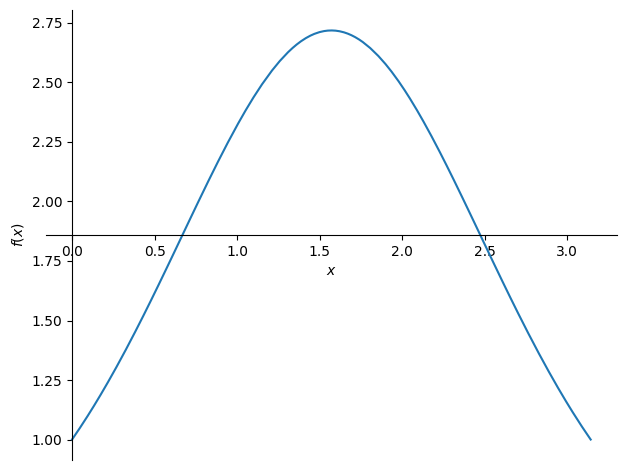

In [32]:
plot(f, (x, 0, Pi))

### Задание 2.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7  на одном периоде, построить график.
$$
f(x) = \frac{1}{\sin(x) + \cos(x)}.
$$
###### 1. Область определения

In [33]:
x = sympy.Symbol("x")
f = 1/(Sin(x) + Cos(x))
D = continuous_domain(f, x, S.Reals)
D

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers)))

Сингулярные точки (точки, где функция не определена)

In [34]:
singularities(f, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

###### 2. Область значений

In [35]:
function_range(f, x, S.Reals)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 3. Периодичность

In [36]:
periodicity(f, x, check=False)

2*pi

###### 4. Стационарные точки

In [37]:
stationary_points(f, x)

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))))

###### 5. Максимальное и минимальное значения функции

In [38]:
display(maximum(f, x), minimum(f, x))

oo

-oo

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [39]:
period_pi = Interval(0, Pi)
continuous_domain(f, x, period_pi)

Union(Interval.Ropen(0, 3*pi/4), Interval.Lopen(3*pi/4, pi))

Сингулярные точки (точки, где функция не определена)

In [40]:
singularities(f, x, period_pi)

{3*pi/4}

###### 2. Область значений

In [41]:
function_range(f, x, period_pi)

Union(Interval(-oo, -1), Interval(sqrt(2)/2, oo))

###### 4. Стационарные точки

In [42]:
stationary_points(f, x, period_pi)

{pi/4}

###### 5. Максимальное и минимальное значения функции

In [43]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

oo

-oo

###### 6. Монотонность

In [44]:
#Исследуем на периоде открытые интервалы (Interval.open), на которые период разбивают сингулярные и стационарные точки
intervals = [Interval.open(0, Pi/4), Interval.open(Pi/4, 3*Pi/4), Interval.open(3*Pi/4, Pi)]
for interval in intervals:
 display(interval)
 print("Monotonic:", is_monotonic(f, interval=interval))
 print("is decreasing: ", is_decreasing(f, interval=interval))
 print("is increasing: ", is_increasing(f, interval=interval))
 print("is strictly decreasing : ", is_strictly_decreasing(f, interval=interval))
 print("is strictly increasing : ", is_strictly_increasing(f, interval=interval))

Interval.open(0, pi/4)

Monotonic: True
is decreasing:  True
is increasing:  False
is strictly decreasing :  True
is strictly increasing :  False


Interval.open(pi/4, 3*pi/4)

Monotonic: True
is decreasing:  False
is increasing:  True
is strictly decreasing :  False
is strictly increasing :  True


Interval.open(3*pi/4, pi)

Monotonic: True
is decreasing:  False
is increasing:  True
is strictly decreasing :  False
is strictly increasing :  True


###### 7. Минимальное и максимальное значение функции на периоде

In [45]:
right = 0
for k in range(4):
 left = right
 right = left + Pi/4
 display(Interval.open(left, right))
 f_AccB = f.subs(x, AccumBounds(left, right))
 display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)

Interval.open(0, pi/4)

AccumBounds(1/(sqrt(2)/2 + 1), sqrt(2))

sqrt(2)

1/(sqrt(2)/2 + 1)

-1/(sqrt(2)/2 + 1) + sqrt(2)

1/(2*(sqrt(2)/2 + 1)) + sqrt(2)/2

Interval.open(pi/4, pi/2)

AccumBounds(1/(sqrt(2)/2 + 1), sqrt(2))

sqrt(2)

1/(sqrt(2)/2 + 1)

-1/(sqrt(2)/2 + 1) + sqrt(2)

1/(2*(sqrt(2)/2 + 1)) + sqrt(2)/2

Interval.open(pi/2, 3*pi/4)

AccumBounds(1, oo)

oo

1

oo

oo

Interval.open(3*pi/4, pi)

AccumBounds(-oo, -1)

-1

-oo

oo

-oo

###### График

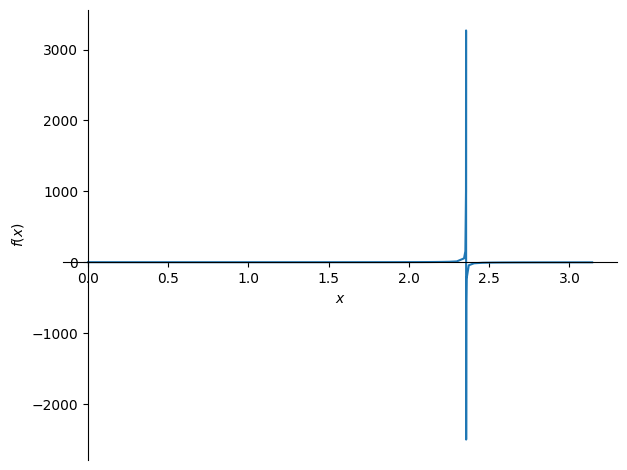

In [51]:
plot(f, (x, 0, Pi))

### Индивидуальное задание.  
Исследовать функцию $f(x)$, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить график.
###### 1. Область определения

In [84]:
# Вариант 31
x = sympy.Symbol("x")
f = (x**2)*((4-x**2)**(1/2))
D = continuous_domain(f, x, S.Reals)
D

Reals

Сингулярные точки (точки, где функция не определена)

In [69]:
singularities(f, x)

EmptySet

###### 2. Область значений

In [95]:
try:
  function_range(f, x, S.Reals)
except:
  print("не возможно найти область значений")

не возможно найти область значений


###### 3. Периодичность

In [72]:
print(periodicity(f, x, check=False))

None


###### 4. Стационарные точки

In [73]:
stationary_points(f, x)

Union(ConditionSet(x, Eq(0.5*x**2/(4 - x**2)**0.5 - 1.0*(4 - x**2)**0.5, 0), Reals), {0})

###### 5. Максимальное и минимальное значения функции

In [94]:
try:
  display(maximum(f, x), minimum(f, x))
except:
  print("Не возможно найти максимальное и минимальное значение")

Не возможно найти максимальное и минимальное значение


###### 6. Монотонность  

In [75]:
display(is_decreasing(f),
is_increasing(f),
is_monotonic(f),
is_strictly_decreasing(f),
is_strictly_increasing(f))

None

None

False

None

None

###### 7. Минимальное и максимальное значение функции на интервале

In [91]:
f_AccB = f.subs(x, AccumBounds(1, 2))
display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)

AccumBounds(0, 6.92820323027551)

6.92820323027551

0

6.92820323027551

3.46410161513775

###### График

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


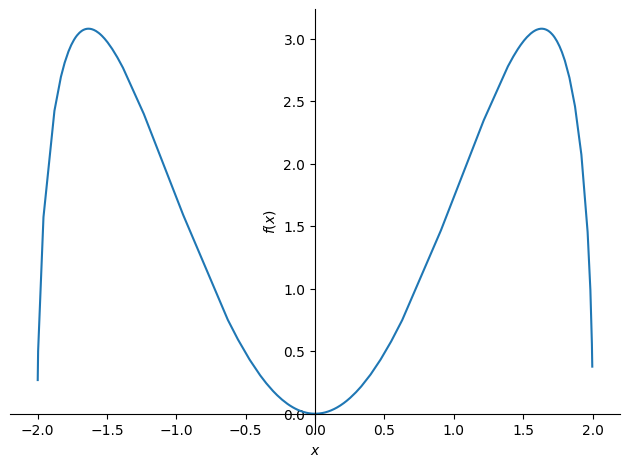

In [92]:
plot(f)